<a href="https://colab.research.google.com/github/italocontreras/ML_Calidad_Vino/blob/main/Calidad_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTAR LIBRERIAS** 


In [ ]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#Load dataset
import io
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score



import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

# **CARGAR DATASET**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

# **EDA**

Veo los primeros registros

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Grafico la matriz de correlacion para ver la relacion entre las caracteristicas

<function matplotlib.pyplot.show>

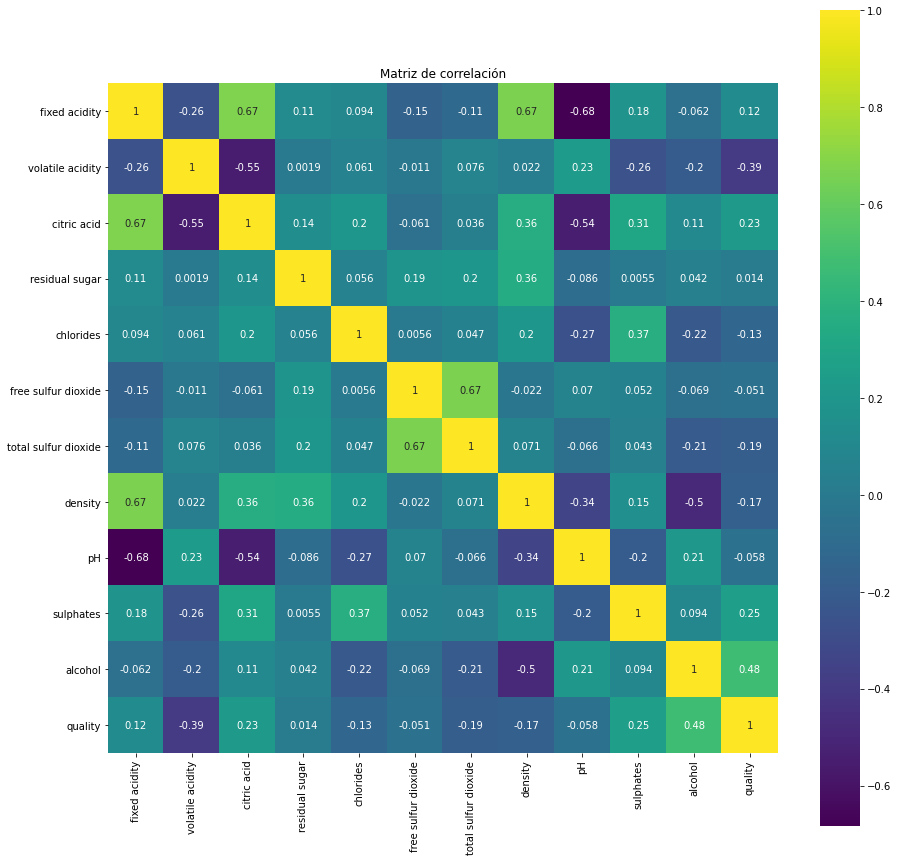

In [ ]:
%matplotlib inline
#Matriz de correlación (Seaborn)
correlation=df.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show

Vemos que no hay valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Graficamos nuestro target para verlo mas de cerca


In [ ]:
fig = px.histogram(df,x='quality')
fig.show()

#**PREPARACION**

## Redefinimos el target

Creamos un nuevo campo llamado 'buena calidad' que tendra valores 0 o 1 tomando como referencia los valores de 'quality'

In [ ]:
# Create Classification version of target variable
df['buenacalidad'] = [1 if x >= 7 else 0 for x in df['quality']]
fig = px.histogram(df,x='buenacalidad')
fig.show()

Eliminamos el campo calidad

In [ ]:
df.drop(['quality'], axis = 1,inplace =True)



##Feature Engineering

###Matriz de correlacion

Con este nuevo target llamado buenacalidad graficamos la matriz de correlacion

<function matplotlib.pyplot.show>

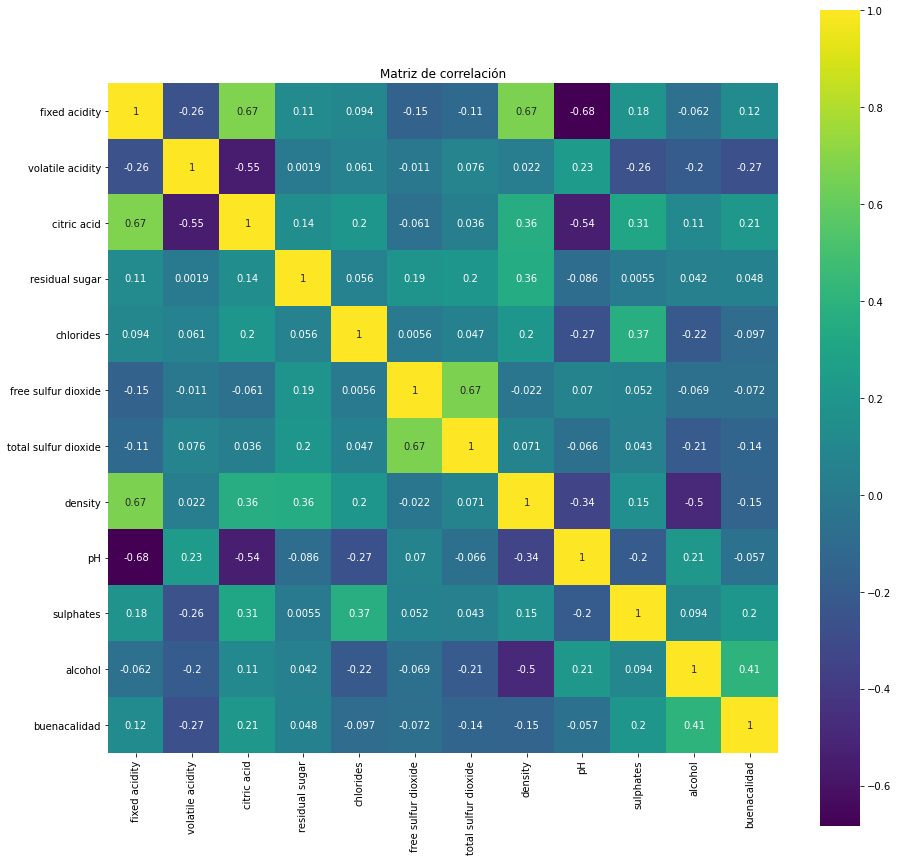

In [ ]:
#Matriz de correlación (Seaborn)
correlation=df.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show



Analizamos la correlacion entre las caracteristicas y el target

In [ ]:
corrtarget = abs(correlation["buenacalidad"])
corrtarget.sort_values(ascending = True)

residual sugar          0.047779
pH                      0.057283
free sulfur dioxide     0.071747
chlorides               0.097308
fixed acidity           0.120061
total sulfur dioxide    0.139517
density                 0.150460
sulphates               0.199485
citric acid             0.214716
volatile acidity        0.270712
alcohol                 0.407315
buenacalidad            1.000000
Name: buenacalidad, dtype: float64

Vemos que las caracteristicas que tienen una menor correlacion con el target son 'buenacalidad' son 'residual sugar', 'pH' y 'free sulfur dioxide'

Analizamos si las caracteristicas tienen una correlacion alta entre ellas (> 0.7) 

In [ ]:
corr_matrix = correlation.abs()
#corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
#upper
drop = [column for column in upper.columns if any(upper[column] > 0.70)]


Vemos que no hay ninguna

In [ ]:
drop

[]

###Backward'

Dividimos el df entre las caracteristicas y el target

In [ ]:
X = df.drop(['buenacalidad'], axis = 1)
Y = df['buenacalidad']

Analizamos las caracteristicas

In [ ]:
X_1 = sm.add_constant(X)
model = sm.OLS(Y,X_1).fit()
#model.pvalues.sort_values(ascending = True)
model.pvalues[model.pvalues>0.05].sort_values(ascending = False) 

#metodop = ['const','fixed acidity ','citric acid','residual sugar','density']

pH                     0.845516
free sulfur dioxide    0.581817
citric acid            0.201774
dtype: float64

Estas caracteristicas son las que se deberian eliminarp porque tienen un p > 0.05

###Caracteristicas recursivas

In [ ]:

model = LogisticRegression(solver='lbfgs',max_iter=200)
rfe = RFE(model,5)
fit = rfe.fit(X,Y)
print(list(df.columns))
print(fit.n_features_)
#print(fit.n_features_)
print(fit.support_)
#b = fit.ranking_
print(fit.ranking_)
#los menos importantes son: 



['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'buenacalidad']
5
[False  True False False  True False False False  True  True  True]
[3 1 2 4 1 7 6 5 1 1 1]


Vemos que las caracteristicas menos importantes son 'free sulfur dioxide','total sulfur dioxide','density' y 'residual sugar'

###Conclusion

Luegos de hacer este analisis de caracteristicas procederemos a eliminar 'residual sugar' y 'free sulfur dioxide' 

In [ ]:
df.drop(['residual sugar','free sulfur dioxide'], axis = 1,inplace =True)

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,buenacalidad
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0


# **MODELADO**

##Division (train y test)

Dividimos nuestra data para entrenamiento y prueba

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

##Algoritmos simples


Primero vamos a probar los algoritmos simples (Regresion Logistica, KNN, Arbol de decision, Super Vector Classifier y Naive Bayes), vale decir que la estandarizacion lo estamos haciendo en esta misma parte de modelado como se puede observar

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
#scoring = 'neg_mean_squared_error'
scoring = 'accuracy'


# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', StandardScaler()),('LoR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC(kernel='linear'))])))
pipelines.append(('ScaledNBa', Pipeline([('Scaler', StandardScaler()),('Nba', GaussianNB())])))

results = []

names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print({name}, {cv_results.mean()*100}, ({cv_results.std()*100}) )

{'ScaledLoR'} {86.48879551820728} {2.6557391799650647}
{'ScaledKNN'} {86.57212885154063} {2.1227828185008772}
{'ScaledDT'} {86.90826330532214} {3.4496671881406984}
{'ScaledSVC'} {84.65546218487395} {2.440555661430266}
{'ScaledNBa'} {83.07142857142857} {4.126266726413317}


Vemos que todos los algoritmos tienen rendimientos parecidos igual que las varianzas, luego hacemos un analisis boxplot y vemos de mejor forma su comportamiento

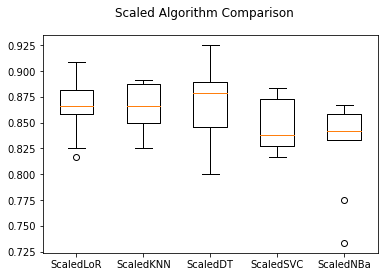

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Ahora procederemos a hacer un alanalisis con algoritmos de conjunto

##Algoritmos ensamblados

Primero vamos a probar los algoritmos ensamblados, vale decir que el escalamiento lo estamos haciendo en esta misma parte igual que para los algoritmos simples

In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print({name}, {cv_results.mean()}, ({cv_results.std()}))

{'ScaledAB'} {0.8590686274509804} {0.021119715612272175}
{'ScaledGBM'} {0.8890966386554622} {0.015264276931466095}
{'ScaledRF'} {0.8949229691876752} {0.021100271821503123}
{'ScaledET'} {0.8924229691876752} {0.02305736048283171}


Vemos que estos algoritmos ensamblados tienen mejores resultados, ahora haremos un analisis boxplot 

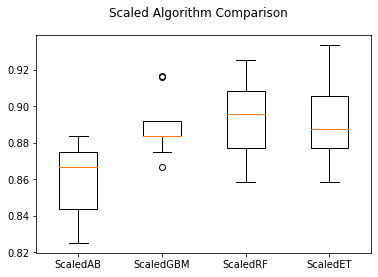

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vemos que el mejor algoritmo es el RandomForest, ya que es el 2do mejor en accuracy(por milesimas debajo del GradientBoosting) pero que tiene una distribucion mas uniforme como se puede observar en su boxplot.

# **FORECASTING**

Vamos a evaluar el modelo seleccionado, para ello primero hacemos la estandarizacion antes del entrenamiento

In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Luego escalar las entradas para el conjunto de datos de test y generamos predicciones.

In [ ]:

# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions)*100)

91.25


Podemos ver 